# Simulation of Layered Control Dynamics with Effective Model
Katherine Xu

This is a model with $M_{ind}, P_{ind}, C_{ind}, R, P, M_{G}, G, G_{m}$ population dynamics.  

In [19]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk", font_scale=1.2, rc={"lines.linewidth": 2.5})
sns.set_style("ticks")
sns.set_style({"xtick.direction": "out","ytick.direction": "out"})
color = ['#c4b5ff', '#ff7f0e', '#2ca02c', '#d62728',
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
          '#bcbd22', '#17becf']


%matplotlib inline

In [20]:
#declaring function for active hill 
def act_hill (species, k):
    return species / (species + k)

In [21]:
#declaring function for repressive hill
def rep_hill (species, k):
    return k / (species + k)

In [22]:
# initial conditions for species;
t0 = np.linspace(0, 20, 100)
Mind_0 = 0 * t0 
Pind_0 = 0 * t0 
Cind_0 = 0 * t0 
MG_0 = 0 * t0 
R_0 = 0 * t0 
P_0 = 0 * t0 
G_0 = 0 * t0 
Gm_0 = 0 * t0 

In [23]:
#12 hours
t1 = np.linspace(20, 720, 700)
allcells_0 = np.array([Mind_0[-1], Pind_0[-1], Cind_0[-1], MG_0[-1], R_0[-1], P_0[-1], G_0[-1], Gm_0[-1]])

In [24]:
#declaring parameters

beta_a = 2 #max transcription rate of promoter inducible by Rhl
Kx = 14000 #activation constant of inducer 
KR = 20 #repression constant of RNA repressor
Kp = 200 #repression constant of protein repressor
d_m = 0.1 #degredation/dilution rate of mRNA
ktp = 0.1 #translation rate of inducing protein Pind
d = 0.03 #degradation/dilution rate of all proteins, dominated by dilution
Kr = 0.1 #activating complex maturation rate
beta_b = 20 #max transcription rate of promoter inducible by Cin
K_ind = 200 #activation constant of C
d_r = 0.3 #degradation/dilution rate of sRNA
alpha = 0.2 #maturation rate of GOI
x = 2000000 #inducer
ktg = 0.1 #translation rate of GOI
tx = 1 #scaling factor of universal transcription
tl = 1 #scaling factor of universal translation
ktr = 0.1 #translation rate of regulator protein

In [25]:
#declaring differentials

def initial(allcells, t, beta_a, Kx, KR, Kp, d_m, ktp, d, Kr, beta_b, K_ind, d_r, alpha, x, ktg, tx, tl, ktr, construct):
    
    Mind, Pind, Cind, MG, R, P, G, Gm = allcells

    if construct == "Open":
        f_trans = 1
        f_cis = 1
    elif construct == "Cis":
        f_trans = 1
        f_cis = rep_hill(R, KR)
    elif construct == "Trans":
        f_trans = rep_hill(P, Kp)
        f_cis = 1
    elif construct == "Layered":
        f_trans = rep_hill(P, Kp)
        f_cis = rep_hill(R, KR)

    dMind_dt = (tx * beta_a * act_hill(x, Kx) * f_trans) - (d_m * Mind)

    dPind_dt = (tl * ktp * Mind) - (d * Pind) - (Kr * Pind)

    dCind_dt = (Kr * Pind) - (d * Cind)

    dMG_dt = (tx * beta_b * act_hill(Cind, K_ind) * f_cis) - (d_m * MG)

    dR_dt = (tx * beta_b * act_hill(Cind, K_ind) * f_cis) - (d_r * R)

    dP_dt = (tl * ktr * MG) - (d * P)

    dG_dt = (tl * ktg * MG) - (alpha * G) - (d * G)

    dGm_dt = (alpha * G) - (d * Gm)
    
    return np.array([dMind_dt, dPind_dt, dCind_dt, dMG_dt, dR_dt, dP_dt, dG_dt, dGm_dt])

In [26]:
def odeplot(ode, changeInLabel='', location='lower right'):
    legend = ["Open", "Cis", "Trans", "Layered"]
    colors = ["blue", "red", "orange", "purple"]

    for i in range(0,4):
        args = (beta_a, Kx, KR, Kp, d_m, ktp, d, Kr, beta_b, K_ind, d_r, alpha, x, ktg, tx, tl, ktr, legend[i])
        
        t = np.concatenate((t0,t1))
        
        allcells = scipy.integrate.odeint(ode, allcells_0, t, args=args)
        
        plt.plot(t, allcells[:,7], label=legend[i], color=colors[i])

    plt.rcParams['figure.figsize'] = [10, 7]
    plt.rcParams['figure.dpi'] = 70
    plt.xlabel('time (min)')
    plt.ylabel('FL (A.U.)')
    plt.legend(loc=location)
    #plt.axis([0, 350, 0, 800])
    plt.title(changeInLabel, fontsize=25, pad=15)

# Version 1 (Initial Graph)

$\frac{dM_{ind}}{dt} = f_{tx} \cdot \beta_A \cdot (\frac{x}{K_x + x}) \cdot f_{trans} - d_m \cdot M_{ind}$

$\frac{dP_{ind}}{dt} = f_{tl} \cdot k_{tp} \cdot M_{ind} - d \cdot P_{ind} - K_{r} \cdot P_{ind}$

$\frac{dC_{ind}}{dt} = K_r \cdot P_{ind} - d \cdot C_{ind}$

$\frac{dM_G}{dt} = f_{tx} \cdot \beta_B \cdot (\frac{C_{ind}}{K_{ind} + C_{ind}}) \cdot f_{cis} - d_m \cdot M_G$

$\frac{dR}{dt} = f_{tx} \cdot \beta_B \cdot (\frac{C_{ind}}{K_{ind} + C_{ind}}) \cdot f_{cis} - d_r \cdot R$

$\frac{dP}{dt} = f_{tl} \cdot k_{tr} \cdot M_G - d \cdot P$

$\frac{dG}{dt} = f_{tl} \cdot k_{tg} \cdot M_g - a \cdot G - d \cdot G$

$\frac{dG_m}{dt} = a \cdot G - d \cdot G_m$

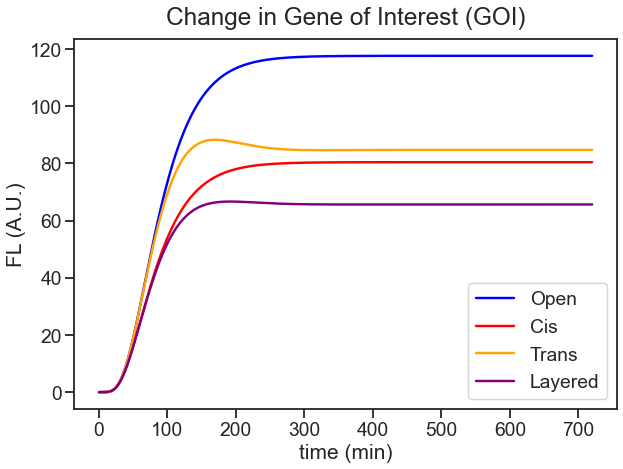

In [28]:
odeplot(initial, 'Change in Gene of Interest (GOI)')

# Version 2 (With dynamic dilution)

$\frac{dC}{dt} = R_{g} \cdot (1 - \frac{C}{C_{max}}) \cdot C$

$d = R_{g} \cdot (1 - \frac{C}{C_{max}})$

In [29]:
Rg = 0.012 #maximum growth rate of cells when there are infinite resources
C_max = 800000000 #maximum cells amounts able to grow in this environment
C_0 = 0.01 * C_max
allcells_0 = np.array([Mind_0[-1], Pind_0[-1], Cind_0[-1], MG_0[-1], R_0[-1], P_0[-1], G_0[-1], Gm_0[-1], C_0])

def dilution(species, max):
    return Rg * (1-(species/max))

In [30]:
#declaring differentials

def ver2(allcells, t, beta_a, Kx, KR, Kp, d_m, ktp, d, Kr, beta_b, K_ind, d_r, alpha, x, ktg, tx, tl, ktr, construct):
    
    Mind, Pind, Cind, MG, R, P, G, Gm, C = allcells
    
    d = dilution(C, C_max)

    if construct == "Open":
        f_trans = 1
        f_cis = 1
    elif construct == "Cis":
        f_trans = 1
        f_cis = rep_hill(R, KR)
    elif construct == "Trans":
        f_trans = rep_hill(P, Kp)
        f_cis = 1
    elif construct == "Layered":
        f_trans = rep_hill(P, Kp)
        f_cis = rep_hill(R, KR)

    dMind_dt = (tx * beta_a * act_hill(x, Kx) * f_trans) - (d_m * Mind)

    dPind_dt = (tl * ktp * Mind) - (d * Pind) - (Kr * Pind)

    dCind_dt = (Kr * Pind) - (d * Cind)

    dMG_dt = (tx * beta_b * act_hill(Cind, K_ind) * f_cis) - (d_m * MG)

    dR_dt = (tx * beta_b * act_hill(Cind, K_ind) * f_cis) - (d_r * R)

    dP_dt = (tl * ktr * MG) - (d * P)

    dG_dt = (tl * ktg * MG) - (alpha * G) - (d * G)

    dGm_dt = (alpha * G) - (d * Gm)
    
    dC_dt = dilution(C, C_max) * C
    
    return np.array([dMind_dt, dPind_dt, dCind_dt, dMG_dt, dR_dt, dP_dt, dG_dt, dGm_dt, dC_dt])

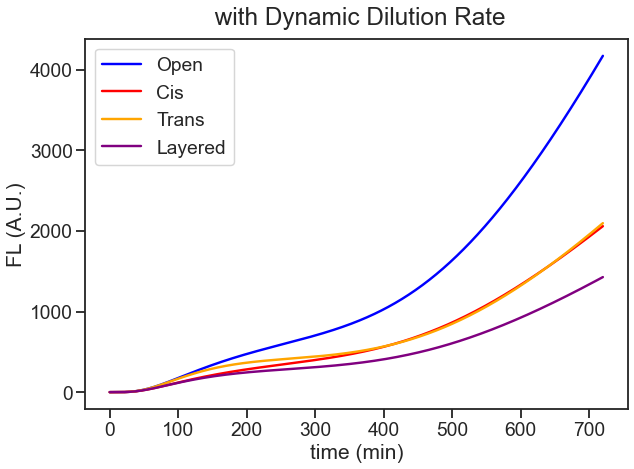

In [31]:
odeplot(ver2, ' with Dynamic Dilution Rate', 'upper left')

# Version 3 (With dynamic degradation)

$d = R_{g} \cdot (1 - \frac{C}{C_{max}}) + (dp_{max} \cdot \frac{C}{C_{max}} \cdot (1 - \frac{P_{tot}}{P_{max}}))$

In [32]:
dp_max = 0.007 #max protein degradation rate
P_max = 10000 #protein capacity in a cell
allcells_0 = np.array([Mind_0[-1], Pind_0[-1], Cind_0[-1], MG_0[-1], R_0[-1], P_0[-1], G_0[-1], Gm_0[-1], C_0])

def degradation(species, max, P_tot, P_max):
    return dp_max * (species/max) * (1-(P_tot/P_max))

In [33]:
#declaring differentials

def ver3(allcells, t, beta_a, Kx, KR, Kp, d_m, ktp, d, Kr, beta_b, K_ind, d_r, alpha, x, ktg, tx, tl, ktr, construct):
    
    Mind, Pind, Cind, MG, R, P, G, Gm, C = allcells
    
    P_tot = Pind + Cind + P + G + Gm
    d = dilution(C, C_max) + degradation(C, C_max, P_tot, P_max)

    if construct == "Open":
        f_trans = 1
        f_cis = 1
    elif construct == "Cis":
        f_trans = 1
        f_cis = rep_hill(R, KR)
    elif construct == "Trans":
        f_trans = rep_hill(P, Kp)
        f_cis = 1
    elif construct == "Layered":
        f_trans = rep_hill(P, Kp)
        f_cis = rep_hill(R, KR)

    dMind_dt = (tx * beta_a * act_hill(x, Kx) * f_trans) - (d_m * Mind)

    dPind_dt = (tl * ktp * Mind) - (d * Pind) - (Kr * Pind)

    dCind_dt = (Kr * Pind) - (d * Cind)

    dMG_dt = (tx * beta_b * act_hill(Cind, K_ind) * f_cis) - (d_m * MG)

    dR_dt = (tx * beta_b * act_hill(Cind, K_ind) * f_cis) - (d_r * R)

    dP_dt = (tl * ktr * MG) - (d * P)

    dG_dt = (tl * ktg * MG) - (alpha * G) - (d * G)

    dGm_dt = (alpha * G) - (d * Gm)
    
    dC_dt = dilution(C, C_max) * C
    
    return np.array([dMind_dt, dPind_dt, dCind_dt, dMG_dt, dR_dt, dP_dt, dG_dt, dGm_dt, dC_dt])

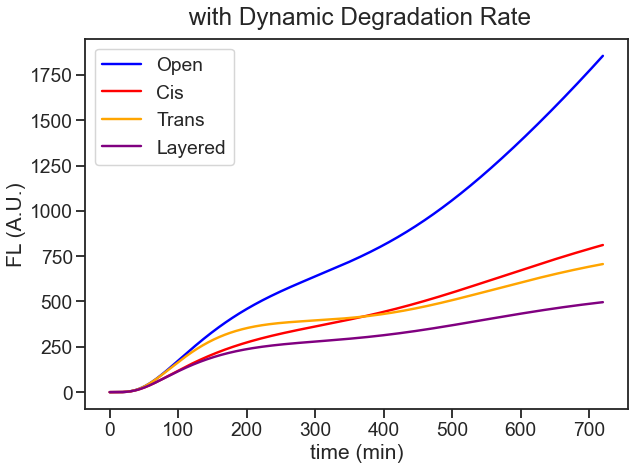

In [34]:
odeplot(ver3, ' with Dynamic Degradation Rate', 'upper left')

# Version 4

$ktp = ktp_{max} \cdot (1 - \frac{P_{tot}}{P_{max}}) \cdot (1 - \frac{C}{C_{max}})$

$ktr = ktr_{max} \cdot (1 - \frac{P_{tot}}{P_{max}}) \cdot (1 - \frac{C}{C_{max}})$

$ktg = ktg_{max} \cdot (1 - \frac{P_{tot}}{P_{max}}) \cdot (1 - \frac{C}{C_{max}})$

In [35]:
def translation(k, C, C_max, P_tot, P_max):
    return k*(1 - P_tot/P_max)*(1 - C/C_max) 

In [36]:
#declaring differentials

def ver4(allcells, t, beta_a, Kx, KR, Kp, d_m, ktp, d, Kr, beta_b, K_ind, d_r, alpha, x, ktg, tx, tl, ktr, construct):
    
    Mind, Pind, Cind, MG, R, P, G, Gm, C = allcells

    P_tot = Pind + Cind + P + G + Gm
    
    d = dilution(C, C_max) + degradation(C, C_max, P_tot, P_max)
    
    ktp = translation(ktp, C, C_max, P_tot, P_max)
    ktr = translation(ktr, C, C_max, P_tot, P_max)
    ktg = translation(ktg, C, C_max, P_tot, P_max)
    
    if construct == "Open":
        f_trans = 1
        f_cis = 1
    elif construct == "Cis":
        f_trans = 1
        f_cis = rep_hill(R, KR)
    elif construct == "Trans":
        f_trans = rep_hill(P, Kp)
        f_cis = 1
    elif construct == "Layered":
        f_trans = rep_hill(P, Kp)
        f_cis = rep_hill(R, KR)

    dMind_dt = (tx * beta_a * act_hill(x, Kx) * f_trans) - (d_m * Mind)

    dPind_dt = (tl * ktp * Mind) - (d * Pind) - (Kr * Pind)

    dCind_dt = (Kr * Pind) - (d * Cind)

    dMG_dt = (tx * beta_b * act_hill(Cind, K_ind) * f_cis) - (d_m * MG)

    dR_dt = (tx * beta_b * act_hill(Cind, K_ind) * f_cis) - (d_r * R)

    dP_dt = (tl * ktr * MG) - (d * P)

    dG_dt = (tl * ktg * MG) - (alpha * G) - (d * G)

    dGm_dt = (alpha * G) - (d * Gm)
    
    dC_dt = dilution(C, C_max) * C
    
    return np.array([dMind_dt, dPind_dt, dCind_dt, dMG_dt, dR_dt, dP_dt, dG_dt, dGm_dt, dC_dt])

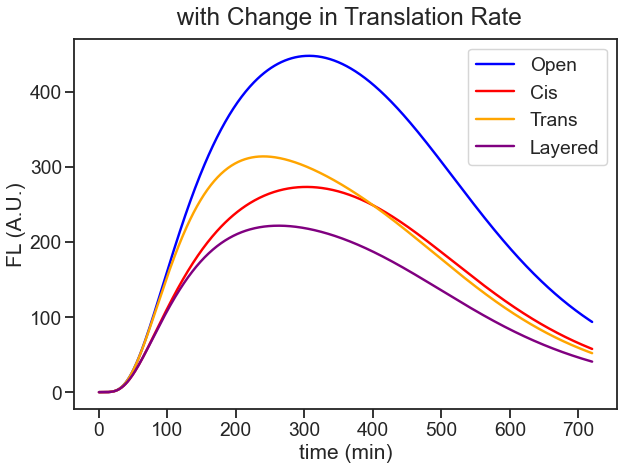

In [37]:
odeplot(ver4, ' with Change in Translation Rate', 'upper right')

# Version 5

$\beta_{rhl} = \beta_{rhlmax} \cdot (1 - \frac{R_{tot}}{R_{max}}) \cdot (1 - \frac{C}{C_{max}})$

$\beta_{cin} = \beta_{cinmax} \cdot (1 - \frac{R_{tot}}{R_{max}}) \cdot (1 - \frac{C}{C_{max}})$

In [20]:
beta_rhlmax = 5 #Max transcription rate of inducible promoter Prhl
beta_cinmax = 20 #Max transcription rate of Pcin promoter inducible by C
R_max = 10000 #RNA capacity in a cell
beta_a_0 = 0 
beta_b_0 = 0 
allcells_0 = np.array([Mind_0[-1], Pind_0[-1], Cind_0[-1], MG_0[-1], R_0[-1], P_0[-1], G_0[-1], Gm_0[-1], C_0])

In [23]:
#declaring differentials

def ver5(allcells, t, beta_a, Kx, KR, Kp, d_m, ktp, d, Kr, beta_b, K_ind, d_r, alpha, x, ktg, tx, tl, ktr, construct):
    
    Mind, Pind, Cind, MG, R, P, G, Gm, C = allcells
    
    P_tot = Pind + Cind + P + G + Gm
    R_tot = Mind + MG + R
    
    beta_a = beta_rhlmax * (1-R_tot/R_max) * (1-C/C_max)
    beta_b = beta_cinmax * (1-R_tot/R_max) * (1-C/C_max)
    
    d = dilution(C, C_max) + degradation(C, C_max, P_tot, P_max)
    
    ktp = translation(ktp, C, C_max, P_tot, P_max)
    ktr = translation(ktr, C, C_max, P_tot, P_max)
    ktg = translation(ktg, C, C_max, P_tot, P_max)
    
    if construct == "Open":
        f_trans = 1
        f_cis = 1
    elif construct == "Cis":
        f_trans = 1
        f_cis = rep_hill(R, KR)
    elif construct == "Trans":
        f_trans = rep_hill(P, Kp)
        f_cis = 1
    elif construct == "Layered":
        f_trans = rep_hill(P, Kp)
        f_cis = rep_hill(R, KR)

    dMind_dt = (tx * beta_a * act_hill(x, Kx) * f_trans) - (d_m * Mind)

    dPind_dt = (tl * ktp * Mind) - (d * Pind) - (Kr * Pind)

    dCind_dt = (Kr * Pind) - (d * Cind)

    dMG_dt = (tx * beta_b * act_hill(Cind, K_ind) * f_cis) - (d_m * MG)

    dR_dt = (tx * beta_b * act_hill(Cind, K_ind) * f_cis) - (d_r * R)

    dP_dt = (tl * ktr * MG) - (d * P)

    dG_dt = (tl * ktg * MG) - (alpha * G) - (d * G)

    dGm_dt = (alpha * G) - (d * Gm)
    
    dC_dt = dilution(C, C_max) * C
    
    return np.array([dMind_dt, dPind_dt, dCind_dt, dMG_dt, dR_dt, dP_dt, dG_dt, dGm_dt, dC_dt])

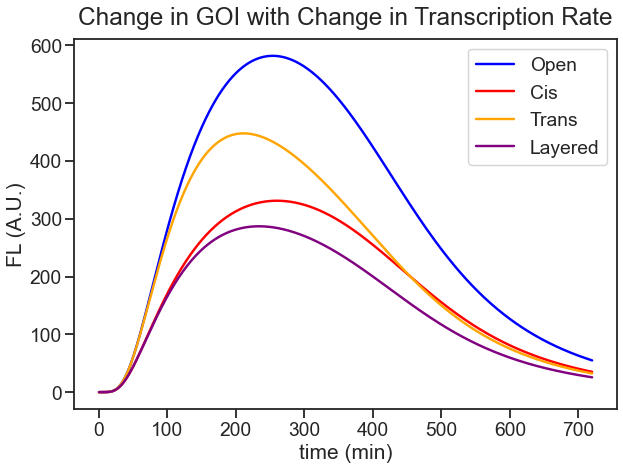

In [24]:
odeplot(ver5, ' with Change in Transcription Rate', 'upper right')